<a href="https://colab.research.google.com/github/JARACH-209/Covid-19-Simulation/blob/master/CoronaSimLessM%26Recovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
def get_init():
    xcord = [np.random.random()*box_width-box_width/2 for i in range(nparticles)]
    ycord = [np.random.random()*box_width-box_width/2 for i in range(nparticles)]
    return xcord, ycord

In [0]:
def get_initial_velo():
    x_vel = [2*(np.random.random()-0.5)*box_width for i in range(int(nparticles))]
    y_vel = [2*(np.random.random()-0.5)*box_width for i in range(int(nparticles))]
    return x_vel, y_vel

Text(0.5, 42.0, 'Sreading pattern with 100% movement and no recovery')

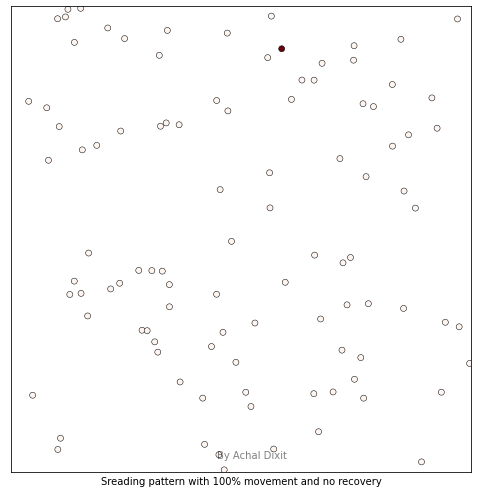

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
import random

nparticles = 100
box_width = 10
n_steps = 5000
dt = 0.001

clr = [0 for i in range(nparticles)]

n = int(random.randint(nparticles*.70,nparticles))
clr[n] += 5 #infecting the RANDOM PATIENT

infect_time = [0 for i in range(nparticles)]      #time for which a patient becomes infected
infection_period = 900      #multiple of 60 as FPS =60 so 15  seconds
infect_time[n] += 1200 
infection_range = 0.1 #how close the two people have to be in order to get infected

fig, ax = plt.subplots(figsize=(7,7))

xcord, ycord = get_init()
x_vel, y_vel = get_initial_velo()
for each in range(int(nparticles*.70)):     # making 60 percent prticles stationary
    x_vel[each] = 0
    y_vel[each] = 0

points = ax.scatter(xcord,ycord, c=clr,cmap="Reds",edgecolors="black",linewidths=0.5)

#plot returns a tuple so use points, use ',' after the variable name

fig.tight_layout()

ax.set_ylim(-5, 5)
ax.set_xlim(-5,5)

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])   #removes the axes

ax.text(1, -4.75, 'By Achal Dixit',
         fontsize=10, color='black',
         ha='right', va='bottom', alpha=0.5)
ax.set_xlabel("Sreading pattern with 100% movement and no recovery")

#for i in range(n_steps):
 #   xcord, ycord, x_vel, y_vel = take_step(xcord,ycord, x_vel, y_vel)


In [0]:
def update(frame):
    for i in range(int(nparticles)):
        xcord[i] += x_vel[i]*dt
        ycord[i] += y_vel[i]*dt
        
        if abs( xcord[i]) > box_width/2:
            x_vel[i] = -x_vel[i]
            xcord[i] += x_vel[i]*dt
        if abs( ycord[i]) > box_width/2:
            y_vel[i] = -y_vel[i]
            ycord[i] += y_vel[i]*dt
       #infecting the particles
        for y in range(i+1,int(nparticles)):
            if xcord[i] == xcord[y] and ycord[i] == ycord[y] or abs(xcord[i] - xcord[y]) < infection_range and abs(ycord[i] - ycord[y]) < infection_range :
                #tweak the infection_range parameter to get the infection range.
            # if xcord[i] == xcord[y] and ycord[i] == ycord[y]: will not work as the points need to same after many decimal places which is almost impossible
                if(clr[i]>0 and clr[y]< 5) :
                    clr[y] += 5;
                    infect_time[y] += 900; 
                elif(clr[i]<5 and clr[y]>0):
                    clr[i] += 5;
                    infect_time[i] += 900;
                else: 
                    True

        if infect_time[i] > 0:      #treating the particles
            infect_time[i] -= 1
        if infect_time[i] == 0:
            clr[i] = 0
    
    #points.set_xdata(xcord)
    #points.set_ydata(ycord)
    #plt.cla()
    ax.cla()
    points = ax.scatter(xcord,ycord, c=clr,cmap="Reds",edgecolors="black",linewidths=0.5)
    ax.get_xaxis().set_ticks([])    #hides the axis
    ax.get_yaxis().set_ticks([])    #hides the axis

    ax.text(1, -4.75, 'By Achal Dixit',
         fontsize=10, color='black',
         ha='right', va='bottom', alpha=0.5)
    ax.set_xlabel("Sreading pattern with 30% movement and Recovery")
    #points.set_offsets(np.c_[xcord,ycord])
    return points

In [0]:
%matplotlib inline
matplotlib.rcParams['animation.embed_limit'] = 2**128
ani = animation.FuncAnimation(fig, update,frames= np.arange(1,4000),interval=1)
ani.save('animationSocialDist&Rec.mp4', fps=60);
plt.show()
from IPython.display import HTML
HTML(ani.to_jshtml())

In [0]:
import os
print( os.getcwd() )
print( os.listdir() )

In [0]:
from google.colab import files
files.download( "animationFirst.mp4" )  